# Huấn luyện mô hình nhận diện khuôn mặt
Notebook này trình bày quá trình huấn luyện mô hình nhận diện khuôn mặt sử dụng thư viện `face_recognition`. Các bước bao gồm:
1. Import các thư viện cần thiết
2. Định nghĩa thư mục chứa dữ liệu khuôn mặt
3. Khởi tạo danh sách chứa encoding và tên
4. Mã hóa khuôn mặt từ ảnh
5. Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
6. Lưu mô hình đã huấn luyện
7. Đánh giá mô hình
8. Tạo báo cáo phân loại
9. Vẽ ma trận nhầm lẫn

## 1. Import các thư viện cần thiết
Chúng ta bắt đầu bằng việc import các thư viện cần thiết cho nhận diện khuôn mặt, xử lý dữ liệu và đánh giá.

In [4]:
# 1. Import thư viện cần thiết
import face_recognition
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


## 2. Định nghĩa thư mục chứa dữ liệu khuôn mặt
Xác định thư mục nơi lưu trữ các ảnh khuôn mặt.

In [5]:
# Định nghĩa thư mục chứa dữ liệu khuôn mặt
data_dir = "face_data"


## 3. Khởi tạo danh sách chứa encoding và tên
Tạo danh sách rỗng để lưu trữ các encoding khuôn mặt và tên tương ứng.

In [6]:

# Khởi tạo danh sách chứa encoding và tên
known_face_encodings = []
known_face_names = []


## 4. Mã hóa khuôn mặt từ ảnh
Duyệt qua từng thư mục con (tên người) và từng ảnh để tạo encoding khuôn mặt.

In [7]:

# Duyệt qua từng thư mục con (tên người)
for person_name in os.listdir(data_dir):
    person_dir = os.path.join(data_dir, person_name)
    if not os.path.isdir(person_dir):
        continue
    
    # Duyệt qua từng ảnh của người đó
    for image_name in os.listdir(person_dir):
        image_path = os.path.join(person_dir, image_name)
        image = face_recognition.load_image_file(image_path)
        
        # Tạo encoding cho khuôn mặt
        face_encodings = face_recognition.face_encodings(image)
        if len(face_encodings) > 0:
            known_face_encodings.append(face_encodings[0])
            known_face_names.append(person_name)
            

print("Số lượng khuôn mặt được mã hóa:", len(known_face_encodings))

Số lượng khuôn mặt được mã hóa: 143


## 5. Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
Sử dụng `train_test_split` để chia dữ liệu thành tập huấn luyện và tập kiểm tra.

In [14]:
# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(
    known_face_encodings, known_face_names, test_size=0.2, random_state=42
)

## 6. Lưu mô hình đã huấn luyện
Sử dụng `pickle` để lưu trữ mô hình đã huấn luyện cho lần sử dụng sau.

In [9]:
# Lưu mô hình đã huấn luyện
data = {"encodings": known_face_encodings, "names": known_face_names}
with open("face_model.pkl", "wb") as f:
    pickle.dump(data, f)
print("Huấn luyện mô hình hoàn tất!")


Huấn luyện mô hình hoàn tất!


## 7. Đánh giá mô hình
So sánh tên dự đoán với tên thực tế để đánh giá độ chính xác của mô hình.

In [10]:
# Đánh giá mô hình
correct_predictions = 0
predictions = []
for i, test_encoding in enumerate(X_test):
    matches = face_recognition.compare_faces(X_train, test_encoding)
    name_predictions = [y_train[j] for j in range(len(matches)) if matches[j]]
    predicted_name = max(set(name_predictions), key=name_predictions.count) if name_predictions else "Unknown"
    predictions.append(predicted_name)
    if predicted_name == y_test[i]:
        correct_predictions += 1

In [11]:
accuracy = correct_predictions / len(y_test) if len(y_test) > 0 else 0
print("Độ chính xác của mô hình:", accuracy)

Độ chính xác của mô hình: 1.0


## 8. Tạo báo cáo phân loại
Sử dụng `classification_report` để tạo báo cáo chi tiết về hiệu suất của mô hình.

In [12]:
# 6. Báo cáo phân loại
print("Báo cáo phân loại:")
print(classification_report(y_test, predictions))

Báo cáo phân loại:
              precision    recall  f1-score   support

        binh       1.00      1.00      1.00         4
         huy       1.00      1.00      1.00        21
      nguyen       1.00      1.00      1.00         4

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



## 9. Vẽ ma trận nhầm lẫn
Trực quan hóa ma trận nhầm lẫn để hiểu rõ hơn về hiệu suất của mô hình.

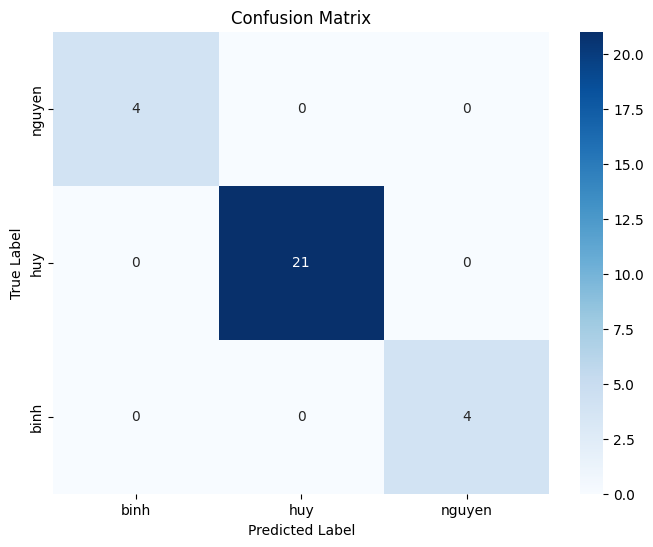

In [13]:
# 7. Vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_train), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()